# Primeiro trabalho computacional - Noções de Inteligência Artificial
Miguel Mendes Luna e Pedro Eduardo Ximenes

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from d2l import tensorflow as d2l
import random

In [2]:
class LinearRegression(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    """Do d2l"""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        self.net = tf.keras.layers.Dense(1, kernel_initializer=initializer)

In [3]:
class LinearRegressionData(d2l.DataModule):  #@save
    """Data for linear regression."""
    def __init__(self, nInputs,data,num_train=5197, num_val=1300,
                 batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        self.X=data[:,0:nInputs]
        self.y=data[:,nInputs]

In [4]:
dados = pd.read_csv("Beer.csv")
dados_matriz = dados.to_numpy()
print(dados_matriz.shape)

(25157, 8)


In [5]:
@d2l.add_to_class(d2l.DataModule)  #@save
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    shuffle_buffer = tensors[0].shape[0] if train else 1
    return tf.data.Dataset.from_tensor_slices(tensors).shuffle(
        buffer_size=shuffle_buffer).batch(self.batch_size)

@d2l.add_to_class(LinearRegressionData)  #@save
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

In [6]:
train_data, val_data = train_test_split(dados_matriz, test_size=0.2)
train_data.shape, val_data.shape

((20125, 8), (5032, 8))

In [7]:
@d2l.add_to_class(LinearRegression)  #@save
def forward(self, X):
    return self.net(X)

In [8]:
@d2l.add_to_class(LinearRegression)  #@save
def loss(self, y_hat, y):
    fn = tf.keras.losses.MeanSquaredError()
    return fn(y, y_hat)

In [9]:
@d2l.add_to_class(LinearRegression)  #@save
def configure_optimizers(self):
    return tf.keras.optimizers.SGD(self.lr)

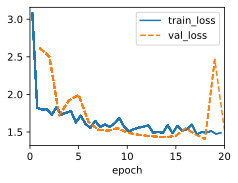

In [10]:
#Treinamento
model = LinearRegression(lr=0.0003)
initialized_data = LinearRegressionData(nInputs=7,data=dados_matriz)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, initialized_data)

In [21]:
#Previsões do modelo
val_inputs = val_data[:,0:7] #As primeiras 7 colunas são as entradas
val_targets = val_data[:,7] #A última coluna é o alvo
predictions = model.call(val_inputs)

#Erro absoluto médio
mae = tf.reduce_mean(predictions - val_targets)

#Preditor trivial, média dos dados alvo de validação
trivial_predictions = np.mean(val_data[:,7])
trivial_mae = np.mean(trivial_predictions - val_targets)

#Classificação por arredondamento
rounded_prediction = tf.round(predictions)
round_error = tf.reduce_mean(rounded_prediction - val_targets)

print(f"Erro Absoluto Médio do modelo: {mae}")
print(f"Erro Absoluto Médio do preditor trivial: {trivial_mae}")
print(f"Erro na classificação por arredondamento: {round_error}")

Erro Absoluto Médio do modelo: 0.35310861468315125
Erro Absoluto Médio do preditor trivial: -1.4120483620033788e-16
Erro na classificação por arredondamento: 0.3517487943172455
